In [1]:
from matplotlib import patches
import matplotlib.pyplot as plt
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

from copy import copy

In [2]:
def draw_segments(item):

    n_x1 = 0
    n_y1 = 0
    for point in item.points:
        if point[0] > n_x1:
            n_x1 = copy(point[0])
        if point[1] > n_y1:
            n_y1 = copy(point[1])
    pallet_width = n_x1
    pallet_height = n_y1

    fig, ax = plt.subplots()

    ax.set_xlim(-0.5, pallet_width + 2)
    ax.set_ylim(-0.5, pallet_height + 2)

    for i in range(len(item.segments)):
        plt.plot([0, pallet_width], [i*h, i*h], color = 'black', linestyle=':')

    figure = patches.Polygon(item.points,
                                linewidth=1,
                                edgecolor='red',
                                fill=False)
    ax.add_patch(figure)

    for i in range(len(item.segments)):
        for sigment in item.segments[i]:
            if sigment[0] != sigment[1]:
                plt.plot(sigment, [i*h, i*h], color = 'blue')
            else:
                ax.scatter(sigment[0], i*h, color = 'blue', s = 4)

    plt.show()

[0, 0]
[3.170347391428294, 0]
[5.268064595747347, 0]
[6.978091804885808, 3]
[4.44083950577793, 4]
[0.0, 6]
[2.215313530508851, 6]
[7.715851169989989, 0]
[8.656706118560578, 0]
[0, 0]


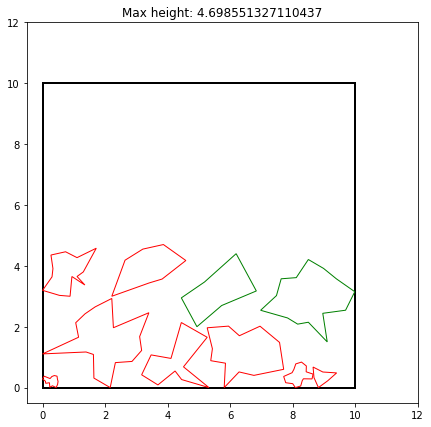

In [3]:
from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 0.5

packing = Packing(width=10, height=10, drill_radius=0)

pallets = Pallets([10, 10])
pallets.grid_step = h
pallets.add_pallet_lines()

# print(pallets.pallet_lines)

# packaging.items = items

packing.create_random_polygons(num_items= 10)

for item in packing.items:
    item.rotation = 1
#     fig, ax = plt.subplots()
#
#     ax.set_xlim(-0.5, 4)
#     ax.set_ylim(-0.5, 4)
#
#
#     figure = patches.Polygon(item.points,
#                                 linewidth=1,
#                                 edgecolor='red',
#                                 fill=False)
#     ax.add_patch(figure)
#     plt.show()



packing.pallets = pallets
packing.h = h
packing.add_segments_for_items()

packing.set_squares()

packing.sort_items(num_sort=2)

# for item in packing.items:
#     draw_segments(item)
packing.segments_bottom_left()
packing.draw_segments_packing()

In [4]:
for item in packing.items:
    print(item.points)

[[1.62724515 1.08801369]
 [1.64277123 0.31174691]
 [2.16405035 0.        ]
 [2.32971765 0.82037569]
 [2.86120127 0.85883066]
 [3.17034739 1.21976159]
 [3.10632715 1.67473277]
 [3.40216396 2.45913044]
 [2.26657392 1.96596087]
 [2.21531353 2.92776715]
 [1.68170214 2.65029185]
 [1.35689951 2.42125335]
 [1.06063891 2.13032116]
 [1.15228595 1.65396498]
 [0.         1.10619325]
 [1.39127688 1.16921352]]
[[4.44083951 2.13671594]
 [4.10921349 0.95778215]
 [3.47386017 1.07330543]
 [3.17034739 0.41947642]
 [3.69117757 0.08748848]
 [4.24039264 0.54453418]
 [4.45041715 0.26313954]
 [5.32391407 0.        ]
 [4.5095109  0.68133932]
 [5.2680646  1.65212029]]
[[6.29840334 1.70312556]
 [5.9505921  2.01867996]
 [5.2680646  1.96437007]
 [5.43469057 1.27570967]
 [5.38183329 0.8835139 ]
 [5.85284579 0.80150886]
 [5.8122443  0.        ]
 [6.28860595 0.51388056]
 [6.76291295 0.40072967]
 [7.71585117 0.59992243]
 [7.5835931  1.48355776]
 [6.95878876 2.01646389]]
[[0.         1.05740153]
 [0.58826126 0.6347525